In [1]:
import sys
sys.path.append("../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ExplicitModels import *
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('./data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('./data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
# activation_type = "sigmoid"
# architecture = [784, 500, 500, 10]

# x,y = next(iter(train_loader))
# x = x.view(x.size(0),-1).to(device).T
# y_one_hot = F.one_hot(y, 10).to(device).T

# neural_lr_start = 0.1
# neural_lr_stop = 0.05
# neural_lr_rule = "constant"
# neural_lr_decay_multiplier = 0.01
# neural_dynamic_iterations = 50

# lr_start = {'ff' : 0.001}

# model = SupervisedPredictiveCoding(architecture, activation_type)

In [5]:
# trn_acc_list = []
# tst_acc_list = []
# pc_train_loss = []

# n_epochs = 1
# lr = lr_start
# for epoch_ in range(n_epochs):
#     lr = {'ff' : lr_start['ff'] * (0.9)**epoch_}
#     for idx, (x, y) in tqdm(enumerate(train_loader)):
#         x, y = x.to(device), y.to(device)
#         x = activation_inverse(x.view(x.size(0),-1).T, "sigmoid")
#         y_one_hot = F.one_hot(y, 10).to(device).T
#         y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
#         _, pc_loss = model.batch_step( x, y_one_hot, lr, neural_lr_start, neural_lr_stop, neural_lr_rule,
#                                        neural_lr_decay_multiplier, neural_dynamic_iterations,
#                                        optimizer = "sgd")
        
#         pc_train_loss.append(pc_loss)
        
#     trn_acc = evaluatePC(model, train_loader, device, activation_type = activation_type, printing = False)
#     tst_acc = evaluatePC(model, test_loader, device, activation_type = activation_type, printing = False)
#     trn_acc_list.append(trn_acc)
#     tst_acc_list.append(tst_acc)
    
#     print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

In [6]:
# plt.figure(figsize=(13, 5), dpi=80)
# plt.subplot(1, 2, 1)
# plt.plot(-np.array(pc_train_loss)[1:400])
# plt.grid()
# plt.ylabel("PC loss", fontsize = 25)
# plt.xlabel("Number of Batch Steps", fontsize = 25)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# # plt.show()

# plt.subplot(1, 2, 2)
# plt.plot(-np.array(pc_train_loss)[1:-1])
# plt.grid()
# plt.ylabel("PC loss", fontsize = 25)
# plt.xlabel("Number of Batch Steps", fontsize = 25)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

# plt.suptitle("SGD with Learning Rate 0.001. Trainin Accuracy : {}".format(trn_acc_list[-1]), fontsize = 25)
# plt.show()

In [7]:
activation_type = "sigmoid"
architecture = [784, 500, 500, 10]

x,y = next(iter(train_loader))
x = x.view(x.size(0),-1).to(device).T
y_one_hot = F.one_hot(y, 10).to(device).T

neural_lr_start = 0.1
neural_lr_stop = 0.05
neural_lr_rule = "constant"
neural_lr_decay_multiplier = 0.01
neural_dynamic_iterations = 50

lr_start = {'ff' : 0.01}

model = SupervisedPredictiveCoding(architecture, activation_type)

In [8]:
trn_acc_list = []
tst_acc_list = []
pc_train_loss = []

n_epochs = 10
lr = lr_start
for epoch_ in range(n_epochs):
    lr = {'ff' : lr_start['ff'] * (0.9)**epoch_}
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = activation_inverse(x.view(x.size(0),-1).T, "sigmoid")
        y_one_hot = F.one_hot(y, 10).to(device).T
        y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        _, pc_loss = model.batch_step( x, y_one_hot, lr, neural_lr_start, neural_lr_stop, neural_lr_rule,
                                       neural_lr_decay_multiplier, neural_dynamic_iterations,
                                       optimizer = "sgd")
        
        pc_train_loss.append(pc_loss)
        
    trn_acc = evaluatePC(model, train_loader, device, activation_type = activation_type, printing = False)
    tst_acc = evaluatePC(model, test_loader, device, activation_type = activation_type, printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

3000it [02:16, 22.02it/s]
2it [00:00, 15.32it/s]

Epoch : 1, Train Accuracy : 0.7328333333333333, Test Accuracy : 0.7403


3000it [04:38, 10.79it/s]
2it [00:00, 14.27it/s]

Epoch : 2, Train Accuracy : 0.7992666666666667, Test Accuracy : 0.8011


3000it [03:26, 14.54it/s]
0it [00:00, ?it/s]

Epoch : 3, Train Accuracy : 0.8321, Test Accuracy : 0.8363


3000it [04:27, 11.21it/s]
2it [00:00, 12.71it/s]

Epoch : 4, Train Accuracy : 0.8542, Test Accuracy : 0.858


3000it [04:41, 10.67it/s]
2it [00:00, 13.64it/s]

Epoch : 5, Train Accuracy : 0.8692, Test Accuracy : 0.8739


3000it [02:54, 17.23it/s]
3it [00:00, 26.19it/s]

Epoch : 6, Train Accuracy : 0.87745, Test Accuracy : 0.8823


3000it [02:38, 18.96it/s]
2it [00:00, 13.05it/s]

Epoch : 7, Train Accuracy : 0.8833166666666666, Test Accuracy : 0.8854


3000it [03:49, 13.05it/s]
2it [00:00, 14.27it/s]

Epoch : 8, Train Accuracy : 0.89125, Test Accuracy : 0.8936


3000it [03:21, 14.88it/s]
2it [00:00, 13.69it/s]

Epoch : 9, Train Accuracy : 0.8941166666666667, Test Accuracy : 0.8959


3000it [03:38, 13.76it/s]


Epoch : 10, Train Accuracy : 0.8984166666666666, Test Accuracy : 0.9005


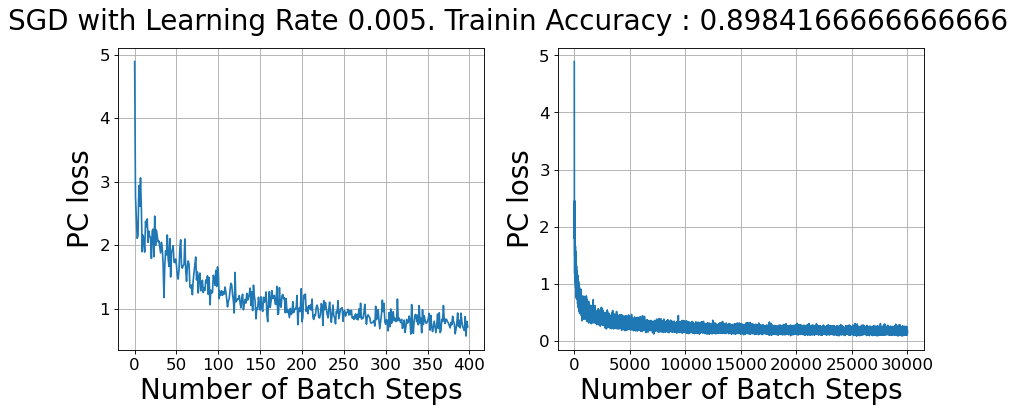

In [9]:
plt.figure(figsize=(13, 5), dpi=80)
plt.subplot(1, 2, 1)
plt.plot(-np.array(pc_train_loss)[1:400])
plt.grid()
plt.ylabel("PC loss", fontsize = 25)
plt.xlabel("Number of Batch Steps", fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.show()

plt.subplot(1, 2, 2)
plt.plot(-np.array(pc_train_loss)[1:-1])
plt.grid()
plt.ylabel("PC loss", fontsize = 25)
plt.xlabel("Number of Batch Steps", fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.suptitle("SGD with Learning Rate 0.005. Trainin Accuracy : {}".format(trn_acc_list[-1]), fontsize = 25)
plt.show()

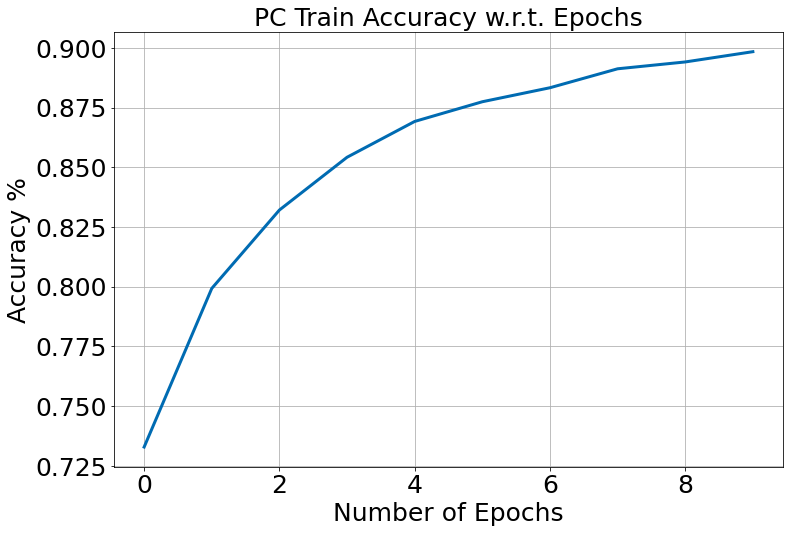

In [10]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

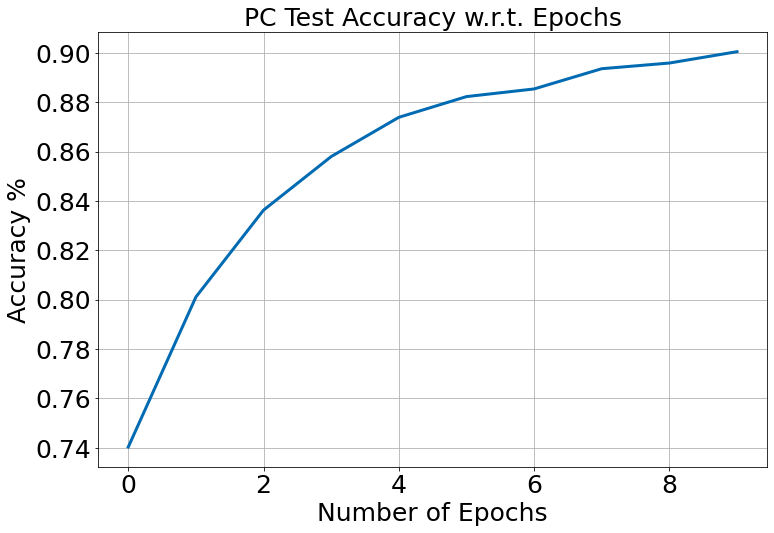

In [11]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)